# Deleting endogenous cells: dates

These do indeed look like they refer to variables that are not available at the time the loan originates. But since we don't have the exact definition of those variables from the data dictionary, let's take a look to compare the dates:

In [22]:
# Find observations that don't have missing values for these columns (most do have missing values  )
other_dates_present = all_data.loc[:, other_dates].apply(lambda row: row.notnull().all(), axis=1)

# Print observations without missing values
print(all_data.loc[other_dates_present, other_dates].head())

                    hardship_start_date hardship_end_date payment_plan_start_date debt_settlement_flag_date  \
issue_d    id                                                                                                 
2013-07-01 5835338             Jun-2017          Oct-2017                Jul-2017                  Dec-2017   
2013-08-01 6550295             Dec-2017          Jan-2018                Jan-2018                  Jun-2018   
2014-02-01 11445747            Nov-2017          Feb-2018                Dec-2017                  Jun-2018   
           12305954            Jun-2017          Aug-2017                Jun-2017                  Mar-2018   
2014-03-01 12997372            Oct-2017          Dec-2017                Oct-2017                  Mar-2018   

                    settlement_date  
issue_d    id                        
2013-07-01 5835338         Nov-2017  
2013-08-01 6550295         May-2018  
2014-02-01 11445747        May-2018  
           12305954        Mar-2

This confirms that those columns – as well as associated columns – can be discarded, because all these dates are later than the issue date. Now let's find all the associated columns (in particular, anything related to hardship, payment plan, and settlement).

In [23]:
print(list(all_data.columns[all_data.columns.str.contains('hardship')]), '\n\n',
      list(all_data.columns[all_data.columns.str.contains('payment_plan')]), '\n\n',
      list(all_data.columns[all_data.columns.str.contains('settlement')]))

['hardship_reason', 'hardship_status', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'hardship_dpd', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount'] 

 ['payment_plan_start_date'] 

 ['debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']


Looks like this search did only turn up associated column, so let's go ahead and delete them all to make it easier to see further endogenous columns. (Note that this search also returned the original date columns, so we do not have to add them separately.)

In [24]:
endogenous_columns = list(all_data.columns[all_data.columns.str.contains('hardship')])
endogenous_columns.extend(all_data.columns[all_data.columns.str.contains('payment_plan')])
endogenous_columns.extend(list(all_data.columns[all_data.columns.str.contains('settlement')]))

In [25]:
all_data = all_data.drop(endogenous_columns, axis=1)

Now let's visually inspect the list of column names again to see if any further column names sound like they were not available at the time the decision about whether the loan should be issued was made.

In [26]:
list(all_data.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_

NameError: name 'drop_cat' is not defined

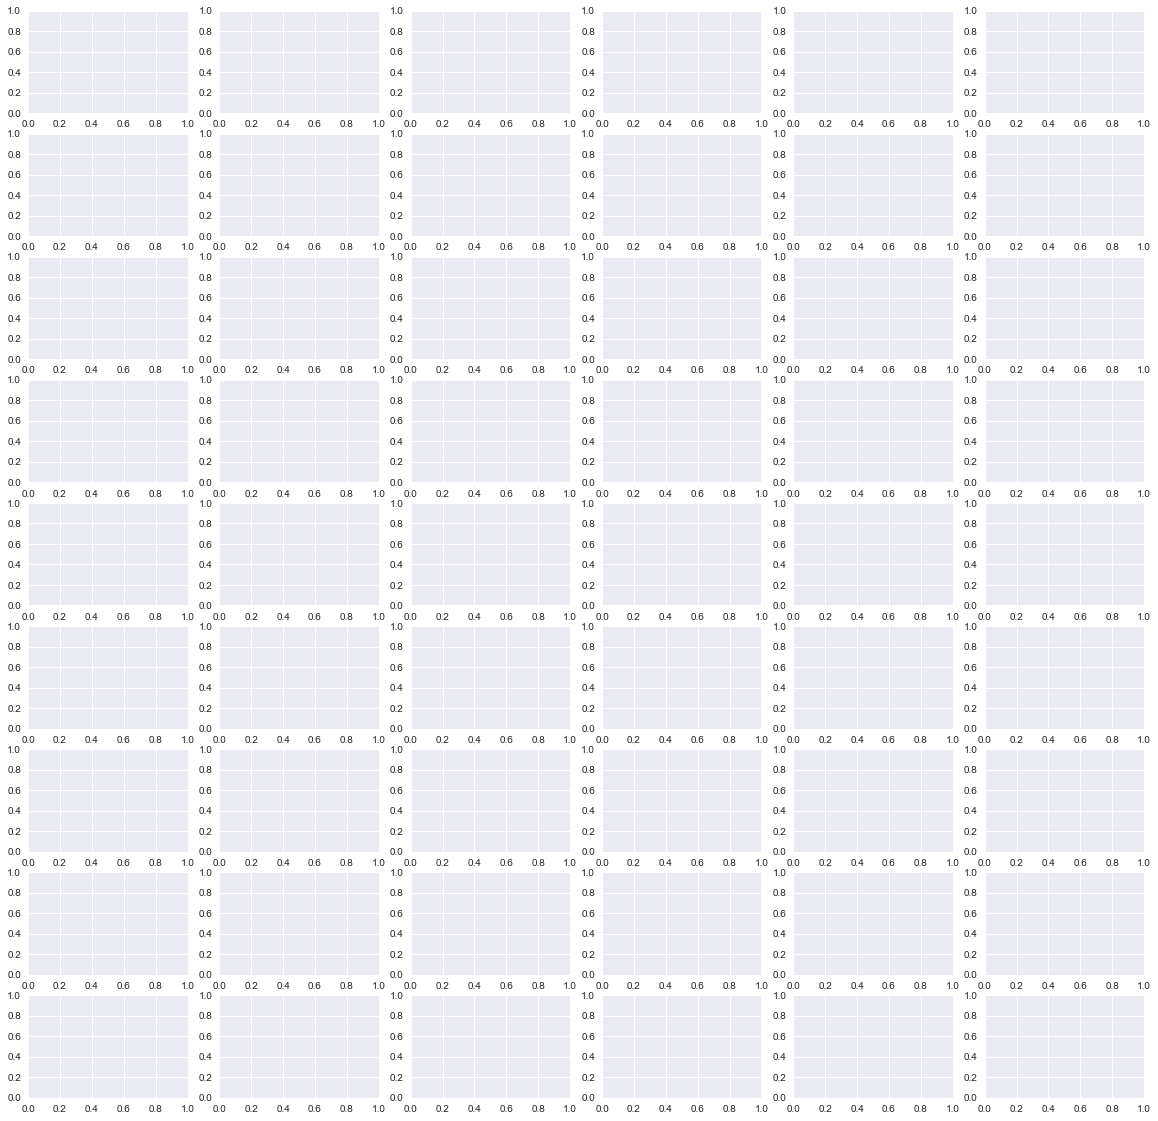

In [30]:

fig, ax = plt.subplots(nrows=9, ncols=6, figsize=(20, 20))
for subplot, col in zip(ax.ravel()[:6], drop_cat):
    counts = all_data.loc[:,col].value_counts()
    subplot.barh(y=counts.index, width=counts)
    subplot.set_title(col)
plt.show()

ax.ravel()[:6]

print(drop_continuous, drop_cat)

assert(len(drop) == len(drop_continuous) + len(drop_cat))

# Inspecting drop variables